# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


In this exercise, we consider the **traveling salesman problem**. It consists in finding a way to connect $N$ cities $\vec{c}_1, \dots, \vec{c}_N$ in a 2D plane such that the total length of the route is minimized. The start city should coincide with the final city and each city must be visited exactly once. As a measure of the total length of the journey, we use:

$$ L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|, $$

where the $\vec{x}_i$ are one particular permutation of the cities and $\vec{x}_{N+1} = \vec{x}_{1}$ as each city has to be visited exactly once.

Here, we choose $N=32$ cities that are either positioned on the circumeference of a circle with unit radius or inside a square with side length $2$. In order to solve the problem of minimizing the route of the traveling salesman under these conditions, we apply a **genetic algorithm**.

In our case, the genetic algorithm has the following form:

1. Create a starting population with $N_{pop}$ individuals. Each of the $(N-1)!$ routes (we fix the starting city to reduce redundant permutations) is assigned with equal probability to the individuals.
2. Compute the fitness (here the $L^{(1)}$-norm as defined above) for every individual.
3. Select two individuals ("mother and father") from the population according to some selection rule.
4. Apply a crossover with a certain probability $p_c$ between these two individuals.
5. Apply mutations to both individuals. Each mutation for each individual has an occurance probability of $p_m$.
6. Repeat steps 2-5 until $N_{pop}$ new individuals have been created. Use these to replace the old population.
7. Repeat steps 2-6 until the individuals have converged sufficiently to the searched minimum route.

We still have to define the selection, crossover and mutation operators that we use:

For the **selection** of two individuals, we sort the whole population according to their fitness, such that the individual with the lowest $L^{(1)}$ has index $0$, while the one with the highest has index $N_{pop} - 1$. Then, we draw two random numbers $r_1, r_2 \in [0, 1)$, and compute:

$$ i_1 = \mathrm{int}(N_{pop} \cdot r_1^2) \\ i_2 = \mathrm{int}(N_{pop} \cdot r_2^2),$$

where $\mathrm{int}(.)$ returns the smallest closest integer to the input. Since $x^2 \leq x,  \forall x \in [0, 1)$. this choice favors small indices. Thereby, inividuals with high fitness are more likely to have offspring. This ensures the *intensification* of our algorithm. Since we do not exclude the propagation of individuals with low fitness completely, we still allow a sufficient amount of *diversification* (and reduce the risk to get stuck in a local minimum).

The **crossover** consists in cutting the chromosomes of both mother and father at a certain position, and reordering the remaining part according to the other chrosome.

We use four different types of possible **mutations** for a given individual:

- The *pair permutation* consists in the exchange of two randomly selected genes of the individual.
- The *swap mutation* is comparable to the pair permuation. The difference is that a random number of successive genes is swapped, and not only a single gene.
- The *inversion mutation* inverts the succession of genes for a random part of the chromosome of the individual.
- The *shift mutation* shifts the succession of genes for a random part of the chromosome of the individual by a random number of positions. The shift is cyclic. 

For this exercise, we create a population of $N_{pop} = 500$ individuals and compute $N_{gen}=250$ cycles (or generations) of the genetic algorithm. In doing so, we chose $p_c=0.5$ and $p_m=0.1$.

For both city maps (circle and square), we analyze the dependency of the average fitness of the better half of the individuals in the population (denoted by $\langle L^{(1)} \rangle$), as well as the fitness of the best fitted individual (denoted by $L^{(1)}$) on the number of generations. 

### Cities on a Circumference

Below, we visualize the results for the map where we placed the cities on the circumference of a circle with unit radius. We observe that both the fitness of the best individual as well as the average fitness of the better part of the population decrease when we increase the numer of generations. This indicates that our genetic algorithm works as more and more individuals have a higher fitness. The saturation of the curves after about $100$ generations shows that the minimum of the fitness (that is the shortest route) has been found.

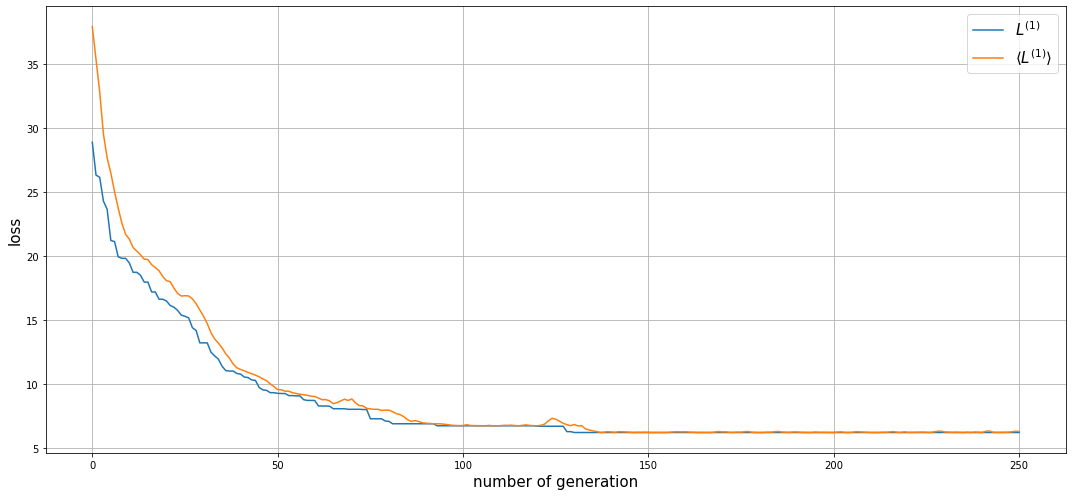

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss(path):
    """
    Plot L1 loss for mean of best half and for best path against the number of generations.
    """
    
    plt.figure(figsize=(15, 7))
    
    ngen, loss_best, loss_mean = np.loadtxt(path, delimiter=",", unpack=True, skiprows=1)
    plt.plot(ngen, loss_best, label=r"$L^{(1)}}$")
    plt.plot(ngen, loss_mean, label=r"$\langle L^{(1)} \rangle$")
    
    plt.xlabel("number of generation", size=15)
    plt.ylabel("loss", size=15)
    plt.legend(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.show()
                                                                                                    
plot_loss("data/circle/l1.txt")

The next figure shows the map with the cities (as blue dots) as well as the route of the best-fitted individual of the last generation (as a blue line). The red dot indicates the city that we (arbitrarely) choose as start and end city. The route corresponds to the route that we would have expected for cities placed on the circumference of a circle. 

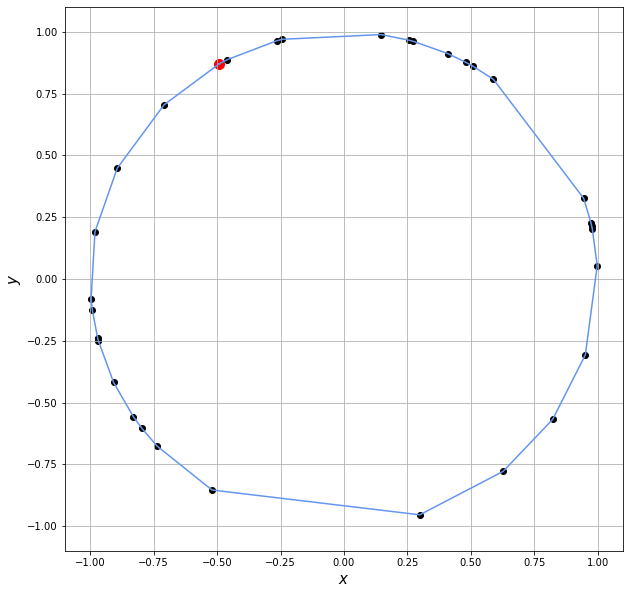

In [12]:
def plot_best(path):
    """
    Plot of best path.
    """
    
    # load data
    x, y = np.loadtxt(path + "map.txt", unpack=True, delimiter=",", skiprows=1)
    best_path = np.loadtxt(path + "l1_path.txt", delimiter=",", dtype=int)[-1]
    
    # insert start and end city (fixed for all individuals)
    best_path = np.insert(best_path, 0, 0, axis=0)
    best_path = np.append(best_path, 0)
    
    plt.figure(figsize=(10, 10))
    
    plt.scatter(x, y, marker="o", color="k")
    plt.scatter(x[0], y[0], marker="o", color="r", s=100)
    plt.plot(x[best_path], y[best_path], color="cornflowerblue")
    
    plt.xlabel("$x$", size=15)
    plt.ylabel("$y$", size=15)
    
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    plt.grid()
    plt.show()
    
plot_best("data/circle/")

### Cities Inside a Square

In the figure below, we illustrate the results for the map where the cities are placed inside a square with side length $2$. Again, we observe that after about $100$ generations the fitness of both the best individual and the average fitness of the better half of individuals saturates.

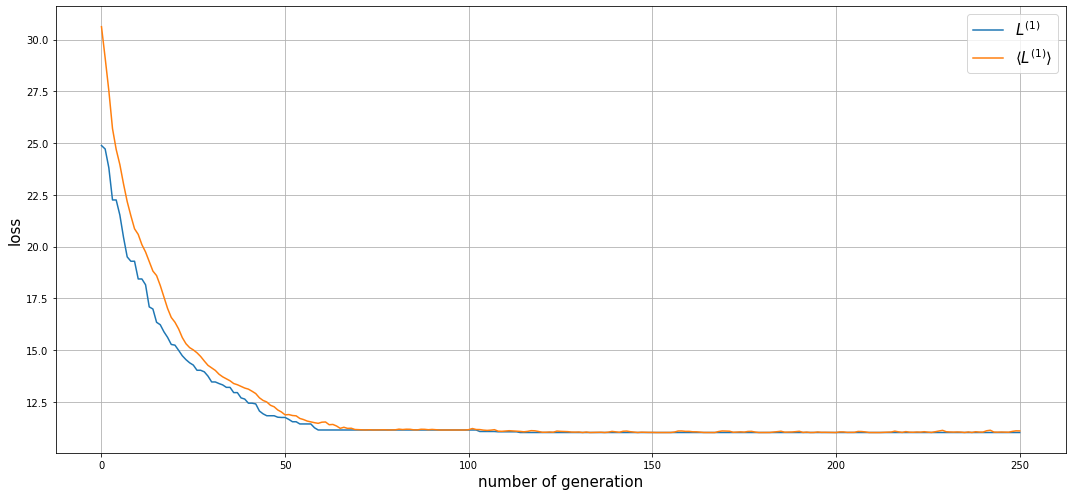

In [3]:
plot_loss("data/square/l1.txt")

Finally, we show the best-fitted individual of the last generation in the figure below. Here, we actually appreciate that we found the shortest route of the traveling salesman because - in the case of cities placed inside a square - the solution to our problem is not immediately obvious.

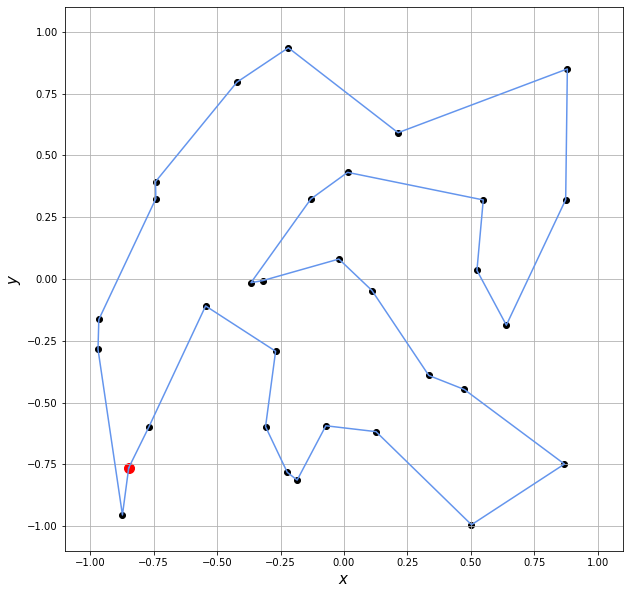

In [4]:
plot_best("data/square/")